In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ForIvan_v2.xlsx to ForIvan_v2.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MasterTrainingData.xlsx to MasterTrainingData.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Prepped_PP56_Data.xlsx to Prepped_PP56_Data.xlsx


In [ ]:
import pandas as pd
import numpy as np

#Import all data
data = pd.read_excel("MasterTrainingData.xlsx", sheet_name='Sheet1')
df= pd.DataFrame(data)
PP56_data= pd.read_excel("Prepped_PP56_Data.xlsx")
df3 = pd.DataFrame(PP56_data)
pp13b = pd.read_excel("ForIvan_v2.xlsx",sheet_name="Sheet1")

In [ ]:
#Make sure all data is loaded from master training set
df['Assemblage'].value_counts()

Sandbath    2061
Unheated     783
Direct       405
Ember        261
Kiln          30
Name: Assemblage, dtype: int64

In [ ]:
df1 = df[df['Source'] == 'E9']
df1['Assemblage'].value_counts()

Sandbath    594
Ember       168
Unheated    102
Direct       63
Name: Assemblage, dtype: int64

In [ ]:
#Clean the data to insure that all the types are correctlly labeled
df1 = df1[df1['Assemblage'].isin(['Unheated','Sandbath','Ember','Direct'])]

In [ ]:
df1

,PlottedFind,Scan,Assemblage,Source,Treatment,L,A,B,400,410,...,610,620,630,640,650,660,670,680,690,700
36,E9.05.03B.24_EM_3,Scan3,Ember,E9,Heated,49.9576,5.3248,17.6297,0.073508,0.074157,...,0.237638,0.239485,0.241276,0.239475,0.241239,0.241341,0.244225,0.250632,0.256837,0.265368
37,E9.05.03B.24_EM_2,Scan2,Ember,E9,Heated,55.9905,7.2336,24.3445,0.087786,0.085701,...,0.321755,0.324564,0.329463,0.332099,0.340150,0.346499,0.351799,0.363210,0.373431,0.384875
38,E9.05.03B.24_EM_1,Scan1,Ember,E9,Heated,46.8054,3.6312,14.6087,0.061760,0.062243,...,0.200511,0.202094,0.204137,0.201761,0.204142,0.206194,0.209745,0.217322,0.225805,0.238395
39,E9.05.03B.03_EM_3,Scan3,Ember,E9,Heated,58.5264,5.2279,19.7163,0.111098,0.109645,...,0.339085,0.339969,0.342657,0.343236,0.349511,0.352768,0.355656,0.363632,0.370659,0.379770
40,E9.05.03B.03_EM_2,Scan2,Ember,E9,Heated,48.7190,3.7001,11.5999,0.118866,0.120740,...,0.203257,0.209191,0.213158,0.214614,0.216366,0.215325,0.212802,0.210056,0.206914,0.204399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,E9.004A.22,Scan 2,Unheated,E9,Unheated,62.2213,6.0814,21.4201,0.135867,0.139066,...,0.384998,0.386596,0.391567,0.397389,0.409873,0.418245,0.421721,0.425180,0.426481,0.429967
3461,E9.004A.22,Scan 1,Unheated,E9,Unheated,65.1880,5.7292,21.5876,0.143402,0.149149,...,0.426847,0.424943,0.427665,0.432041,0.443904,0.453150,0.459071,0.466564,0.470898,0.477770
3462,E9.004A.04,Scan 3,Unheated,E9,Unheated,64.6687,3.7544,15.5386,0.180486,0.194084,...,0.395399,0.394769,0.398802,0.405621,0.417841,0.428125,0.433633,0.438456,0.440844,0.443830
3463,E9.004A.04,Scan 2,Unheated,E9,Unheated,59.5150,7.2252,26.6391,0.097328,0.095577,...,0.363772,0.365796,0.370558,0.374790,0.385331,0.392567,0.398944,0.409103,0.417270,0.427357


In [ ]:
#Prepare the real archeological site data to be run through the model
df2 = pp13b
df2 = df2.drop(['Date', 'Type','StratAgg'], axis=1)
df2 = df2[df2['Assemblage'] == 'PP13B']


In [ ]:
df2

,L,A,B,400,410,420,430,440,450,460,...,610,620,630,640,650,660,670,680,690,700
0,55.121733,5.335867,12.922300,0.136119,0.146263,0.151722,0.154963,0.159414,0.163954,0.167325,...,0.275316,0.279652,0.286024,0.290341,0.293258,0.293848,0.292721,0.293542,0.294701,0.297165
1,60.376600,6.657900,13.744300,0.170125,0.183996,0.188985,0.192355,0.198629,0.203769,0.208299,...,0.348706,0.353576,0.361162,0.367589,0.373516,0.377237,0.378735,0.381776,0.384081,0.387652
2,49.910167,9.475033,16.163500,0.103296,0.108891,0.110444,0.110902,0.112405,0.114307,0.116823,...,0.247185,0.255749,0.266023,0.273561,0.279228,0.282475,0.285973,0.292908,0.300138,0.310027
3,45.032600,4.939200,14.106367,0.084950,0.085670,0.086593,0.088133,0.090674,0.093737,0.096602,...,0.178622,0.182075,0.187895,0.191370,0.192538,0.191644,0.191039,0.193229,0.196374,0.200574
4,31.704267,7.045933,8.680733,0.047052,0.044367,0.045427,0.046676,0.048127,0.050461,0.051613,...,0.093787,0.095189,0.094709,0.094952,0.096675,0.097932,0.098701,0.099630,0.100943,0.102363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,34.682033,4.594767,7.832333,0.060328,0.059436,0.060203,0.060713,0.061195,0.062564,0.063257,...,0.102613,0.104947,0.106110,0.107669,0.110113,0.111936,0.112855,0.113818,0.115004,0.115766
174,51.335667,8.042233,15.945567,0.112771,0.118853,0.120690,0.121504,0.123681,0.126187,0.128940,...,0.253642,0.262665,0.275497,0.284141,0.288737,0.289392,0.289511,0.293283,0.298161,0.305792
175,44.257417,7.640750,12.611783,0.095723,0.097273,0.097229,0.096687,0.096821,0.098150,0.099418,...,0.188075,0.195526,0.206901,0.216264,0.223250,0.227008,0.227985,0.229066,0.230334,0.232965
176,47.947333,5.435600,11.218733,0.094914,0.098961,0.104194,0.110274,0.116890,0.122474,0.125729,...,0.209593,0.212310,0.214213,0.213639,0.214652,0.215316,0.216654,0.220304,0.224278,0.229330


In [ ]:
#Created testing and trainging sets for the model
SC = df1
groupSC = SC.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
X = groupSC.drop(['PlottedFind','Assemblage'], axis=1)
X.columns = X.columns.astype(str)
y = groupSC['Assemblage']

<ipython-input-85-fbdc3f61c976>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC = SC.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [ ]:
SC2 = df2
groupSC2 = SC2.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
pp13b = groupSC2.drop(['PlottedFind','Assemblage'], axis=1)
pp13b.columns = pp13b.columns.astype(str)

<ipython-input-86-69aa36f27f1b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC2 = SC2.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [ ]:
SC3 = df3
groupSC3 = SC3.groupby(["PlottedFind","Assemblage"], as_index=False).mean()
pp56 = groupSC3.drop(['PlottedFind','Assemblage'], axis=1)
pp56.columns = pp56.columns.astype(str)
y2 = groupSC3["PlottedFind"]

<ipython-input-87-0be97b3200c9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupSC3 = SC3.groupby(["PlottedFind","Assemblage"], as_index=False).mean()


In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=26, random_state=42069)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=26, random_state=42069)

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Set up a model (using RandomForestClassifier as an example)
model = RandomForestClassifier()

# Specify the number of bootstrap samples
num_bootstrap_samples = 500
bootstrap_metric = []

# Perform bootstrapping and train models on each bootstrap sample
for i in range(num_bootstrap_samples):
    # Generate a bootstrap sample
    X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=i)

    # Train the model on the bootstrap sample
    model.fit(X_bootstrap, y_bootstrap)
    y_proba = model.predict_proba(X_test)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model on the test set
    auc = roc_auc_score(y_test, y_proba, multi_class='ovr',average='weighted')
    bootstrap_metric.append(auc)



confidence_interval = np.percentile(bootstrap_metric, [2.5, 97.5])

print(f"95% Confidence Interval: {confidence_interval}")



KeyboardInterrupt: 

In [ ]:
#Prediction for Pinicle Point 13B
y_pred1 = rf_model.predict(pp13b)

groupSC2['Assemblage'] = y_pred1

In [ ]:
#Download File
groupSC2.to_excel("PP_13_B_Predictions.xlsx", index=False)
files.download("PP_13_B_Predictions.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Prediction for Pinicle Point 5-6
y_pred2 = rf_model.predict(pp56)

groupSC3['Assemblage'] = y_pred2


In [ ]:
#Download File
groupSC3.to_excel("PP_5-6_Predictions.xlsx", index=False)
files.download("PP_5-6_Predictions.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ember       103
Sandbath     71
Unheated      4
Name: Assemblage, dtype: int64


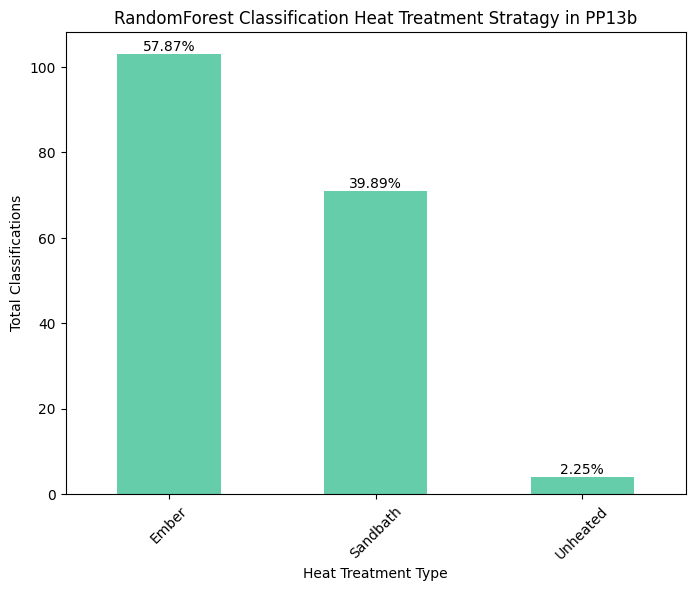

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts
label_counts = groupSC2['Assemblage'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color='mediumaquamarine')

# Add labels and title
plt.xlabel('Heat Treatment Type')
plt.xticks(rotation=45)
plt.ylabel('Total Classifications')
plt.title('RandomForest Classification Heat Treatment Stratagy in PP13b')

#Add percentage
total_count = label_counts.sum()
for i, v in enumerate(label_counts):
    percentage = (v / total_count) * 100
    ax.text(i, v, f'{percentage:.2f}%', ha='center', va='bottom')
# Show the plot
print(label_counts)


Ember       2180
Sandbath    1398
Unheated      62
Direct        23
Name: Assemblage, dtype: int64


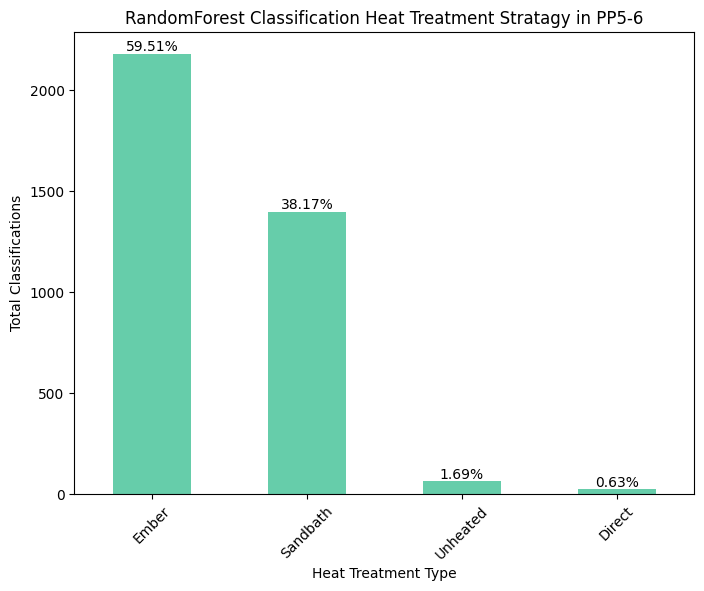

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts
label_counts = groupSC3['Assemblage'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color='mediumaquamarine')

# Add labels and title
plt.xlabel('Heat Treatment Type')
plt.xticks(rotation=45)
plt.ylabel('Total Classifications')
plt.title('RandomForest Classification Heat Treatment Stratagy in PP5-6')

#Add percentage
total_count = label_counts.sum()
for i, v in enumerate(label_counts):
    percentage = (v / total_count) * 100
    ax.text(i, v, f'{percentage:.2f}%', ha='center', va='bottom')
# Show the plot
print(label_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Accuracy:  0.9404761904761905
Precision:  0.944139194139194
Recall:  0.9404761904761905
F1-Score:  0.9404761904761905
Confusion Matrix:
 [[ 4  0  0  0]
 [ 0 32  1  0]
 [ 0  2 38  0]
 [ 0  2  0  5]]


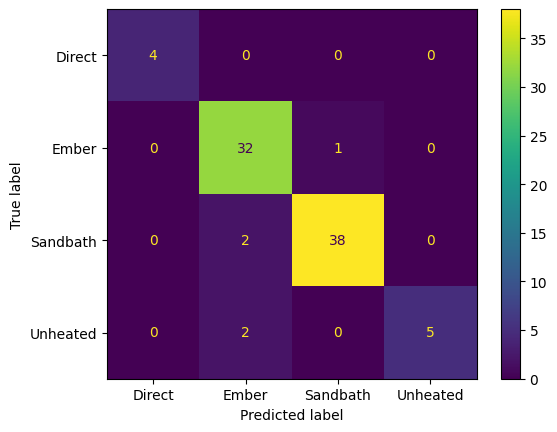

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model, X_test and y_test are your test data
# If you haven't trained the model yet, make sure to do that first.

# Make predictions on the test dataset
y_pred = rf_model.predict(X_test)

# Calculate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive', average='weighted')
recall = recall_score(y_test, y_pred, pos_label='positive', average='weighted')
f1 = f1_score(y_test, y_pred, pos_label='positive', average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42069)
fold = 1
auc = []
accuracy = []
for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=20, random_state=42069)
    clf.fit(X_tr, y_tr)
    pred = clf.predict(X_val)
    pred_prob = clf.predict_proba(X_val)

    acc_score = accuracy_score(y_val, pred)

    # For ROC AUC in multi-class, you need to use a one-vs-one or one-vs-all approach
    # Here, I'm using the one-vs-all approach for simplicity
    auc_score = roc_auc_score(y_val, pred_prob, multi_class='ovo')

    # Do something with acc_score and auc_score for each fold
    print(f"========Fold {fold} =========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")

    fold += 1
    accuracy.append(acc_score)
    auc.append(auc_score)

oof_auc = np.mean(auc)
oof_acc = np.mean(accuracy)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')
print(f'Our out of fold Accuracy score is {oof_acc:0.4f}')


========Fold 1 =========
Our accuracy on the validation set is 0.7619 and AUC is 0.7723
========Fold 2 =========
Our accuracy on the validation set is 0.7143 and AUC is 0.7460
========Fold 3 =========
Our accuracy on the validation set is 0.7381 and AUC is 0.8667
========Fold 4 =========
Our accuracy on the validation set is 0.8095 and AUC is 0.7884
========Fold 5 =========
Our accuracy on the validation set is 0.6905 and AUC is 0.8894
========Fold 6 =========
Our accuracy on the validation set is 0.7857 and AUC is 0.8091
========Fold 7 =========
Our accuracy on the validation set is 0.8333 and AUC is 0.9259
========Fold 8 =========
Our accuracy on the validation set is 0.8571 and AUC is 0.8489
========Fold 9 =========
Our accuracy on the validation set is 0.8095 and AUC is 0.8710
========Fold 10 =========
Our accuracy on the validation set is 0.6585 and AUC is 0.7432
Our out of fold AUC score is 0.8261
Our out of fold Accuracy score is 0.7659


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)
fold = 1
auc = []

for train_idx, val_idx in skf.split(X, y):
    # Index for current fold samples
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    # Index for current validation samples
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    # Fit an SVM model to the current fold samples
    clf = SVC(probability=True, gamma=0.1, decision_function_shape='ovr', C=100)
    clf.fit(X_tr, y_tr)

    # Create a OneVsRestClassifier
    svm_ovr = OneVsRestClassifier(clf)
    svm_ovr.fit(X_tr, y_tr)

    pred = svm_ovr.predict(X_val)
    pred_prob = svm_ovr.predict_proba(X_val)

    # Calculate accuracy and AUC scores
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob, multi_class='ovr')

    auc.append(auc_score)

    print(f"========Fold {fold} =========")
    print(f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}")

    fold += 1

# Calculate and print the mean AUC across all folds
mean_auc = np.mean(auc)
print(f"\nMean AUC across all folds: {mean_auc:0.4f}")






========Fold 1 =========
Our accuracy on the validation set is 0.6905 and AUC is 0.7509
========Fold 2 =========
Our accuracy on the validation set is 0.6667 and AUC is 0.8022
========Fold 3 =========
Our accuracy on the validation set is 0.7381 and AUC is 0.7362
========Fold 4 =========
Our accuracy on the validation set is 0.6905 and AUC is 0.8398
========Fold 5 =========
Our accuracy on the validation set is 0.7143 and AUC is 0.8229
========Fold 6 =========
Our accuracy on the validation set is 0.6905 and AUC is 0.8664
========Fold 7 =========
Our accuracy on the validation set is 0.7381 and AUC is 0.9142
========Fold 8 =========
Our accuracy on the validation set is 0.8095 and AUC is 0.7629
========Fold 9 =========
Our accuracy on the validation set is 0.6905 and AUC is 0.7916
========Fold 10 =========
Our accuracy on the validation set is 0.7561 and AUC is 0.9162

Mean AUC across all folds: 0.8203


In [ ]:
np.mean(auc)

0.7883938568810637

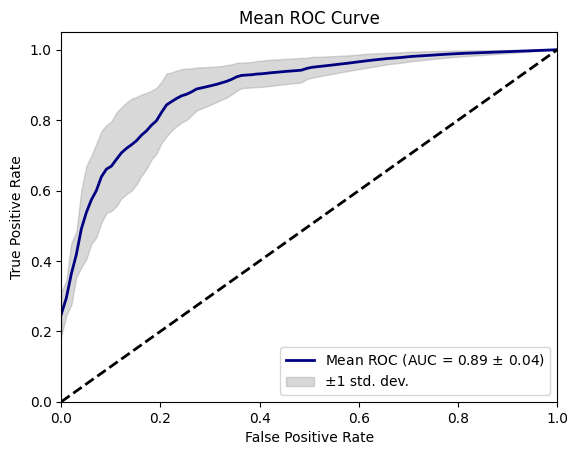

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
all_auc = []

for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=30, random_state=42069)
    clf.fit(X_tr, y_tr)
    pred_prob = clf.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(clf.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_val == clf.classes_[i]).astype(int), pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Interpolate the average tpr at the mean_fpr
    interp_tpr = np.zeros_like(mean_fpr)
    for i in range(len(clf.classes_)):
        interp_tpr += np.interp(mean_fpr, fpr[i], tpr[i])

    interp_tpr /= len(clf.classes_)
    all_tpr.append(interp_tpr)
    all_auc.append(np.mean(list(roc_auc.values())))

    fold += 1

# Calculate the mean and standard deviation of the averaged tpr
mean_tpr = np.mean(all_tpr, axis=0)
std_tpr = np.std(all_tpr, axis=0)

# Plot the averaged ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='navy', label=f'Mean ROC (AUC = {np.mean(all_auc):.2f} $\pm$ {np.std(all_auc):.2f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.3, label='±1 std. dev.')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()


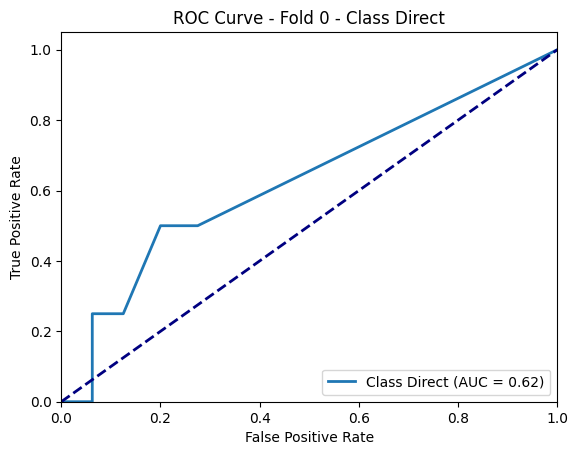

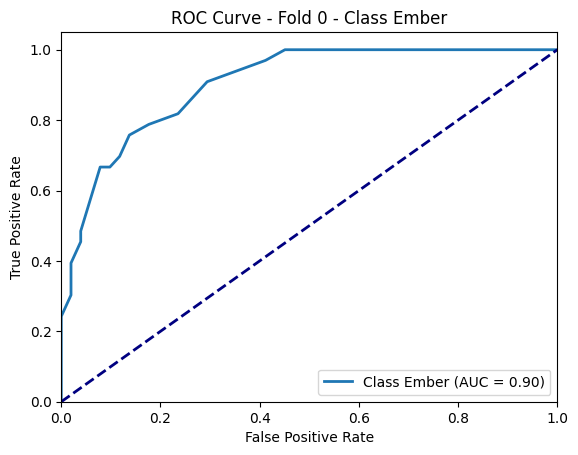

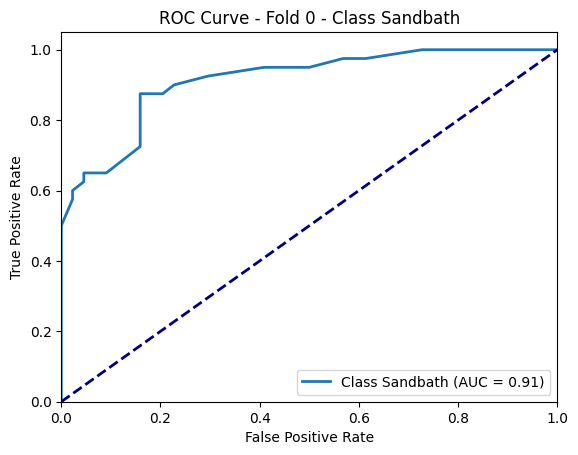

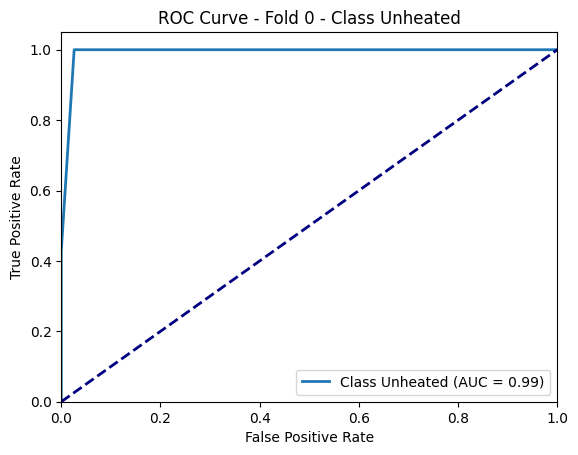

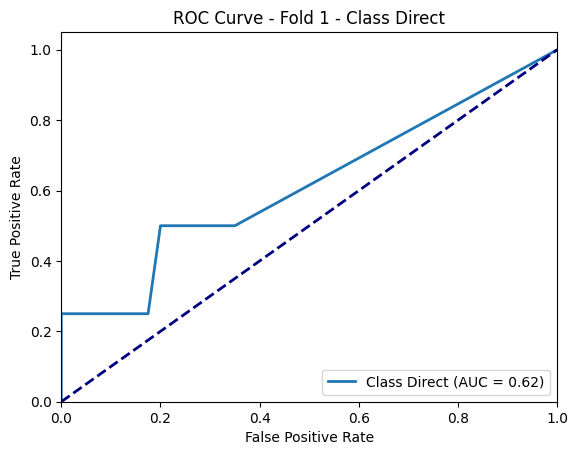

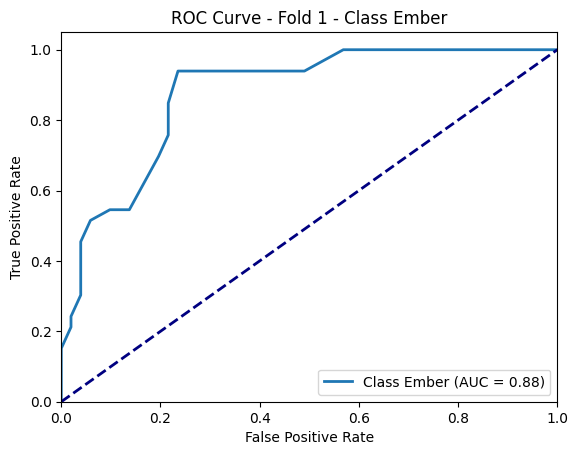

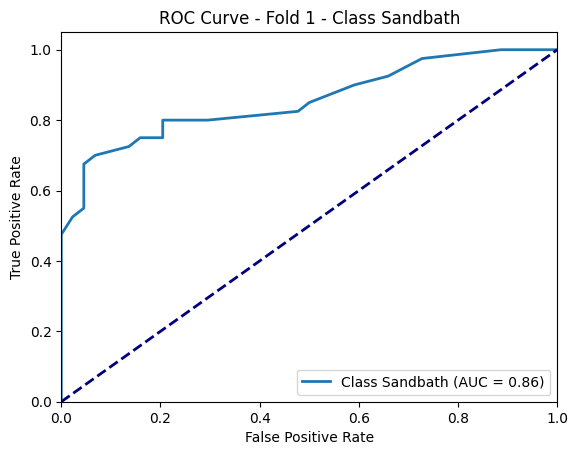

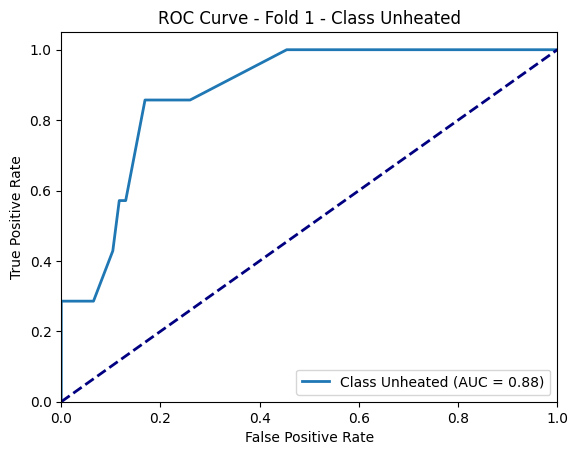

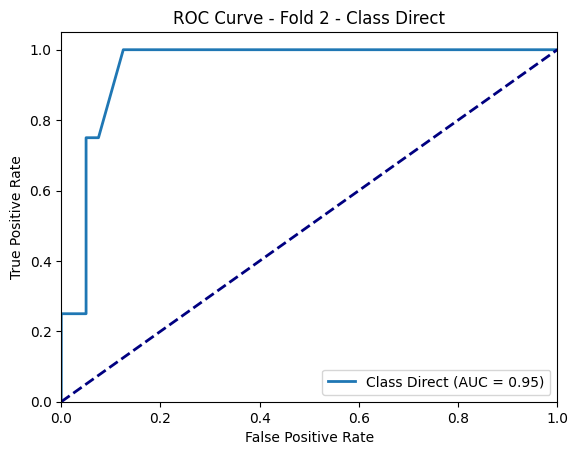

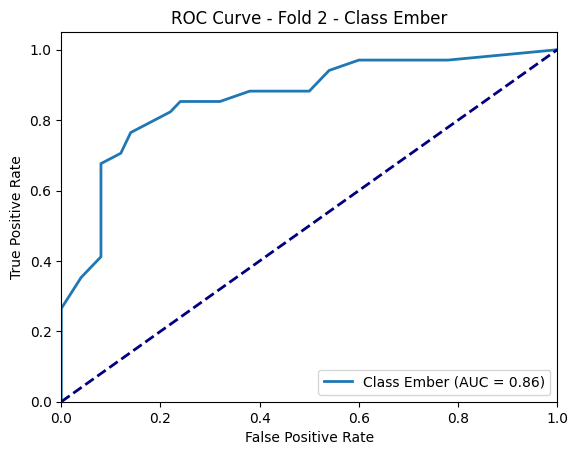

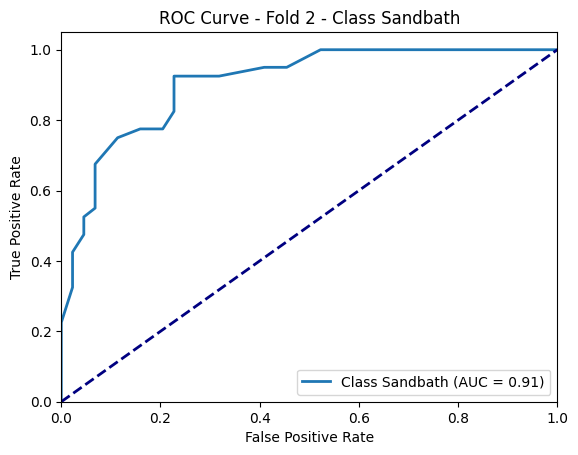

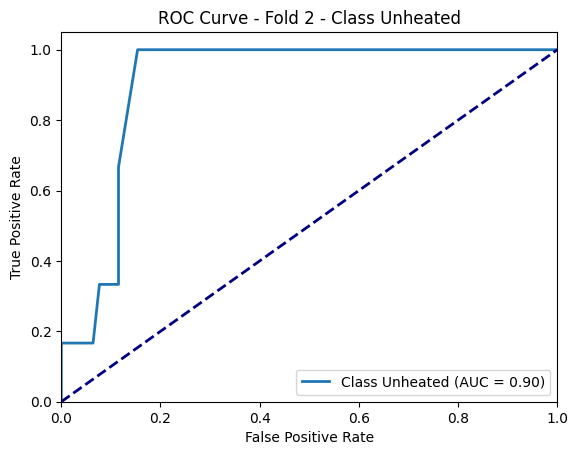

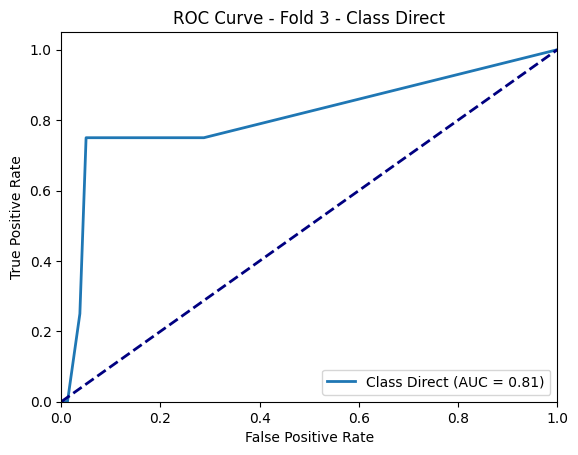

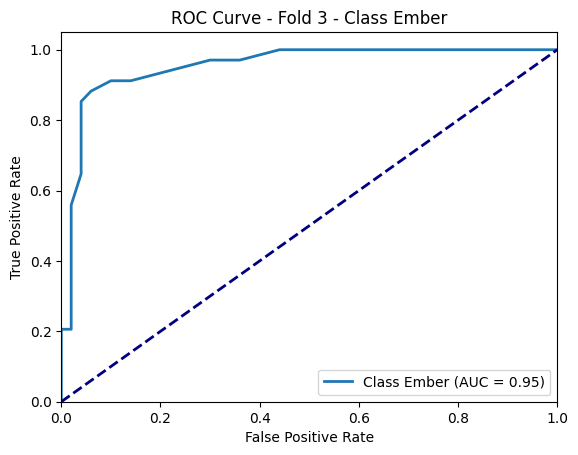

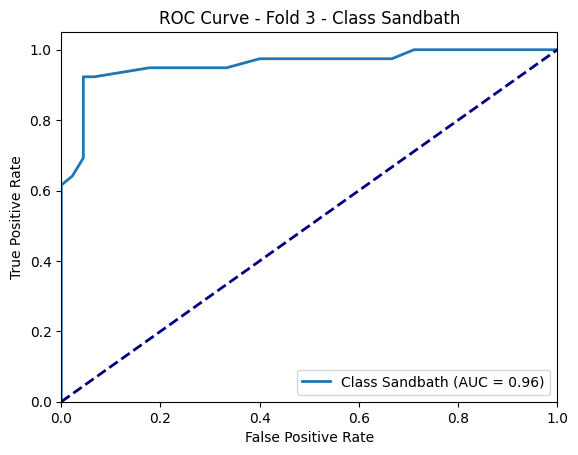

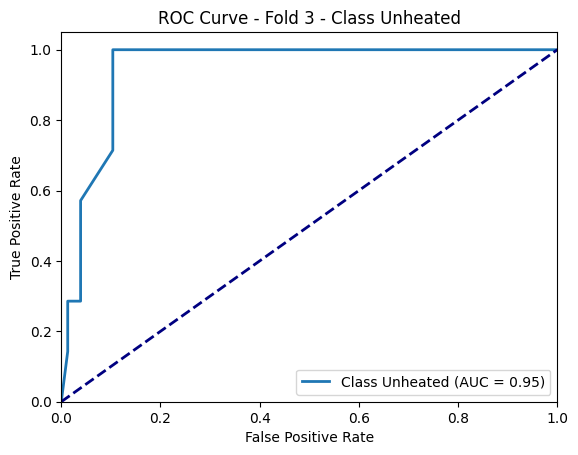

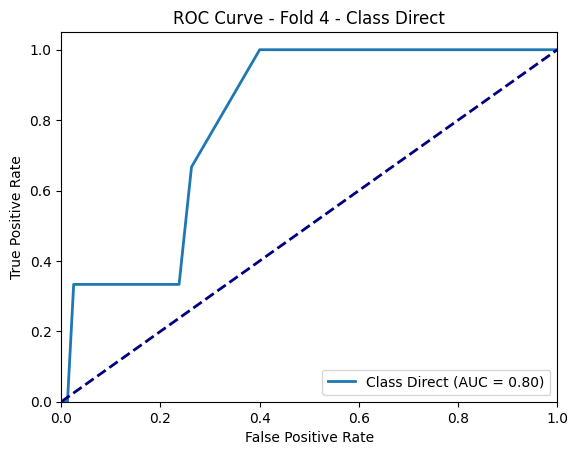

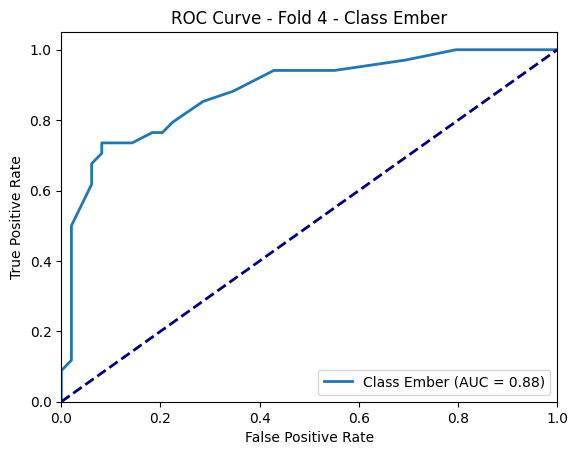

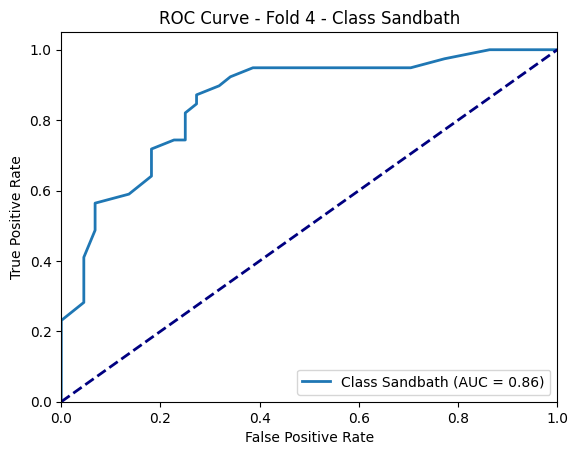

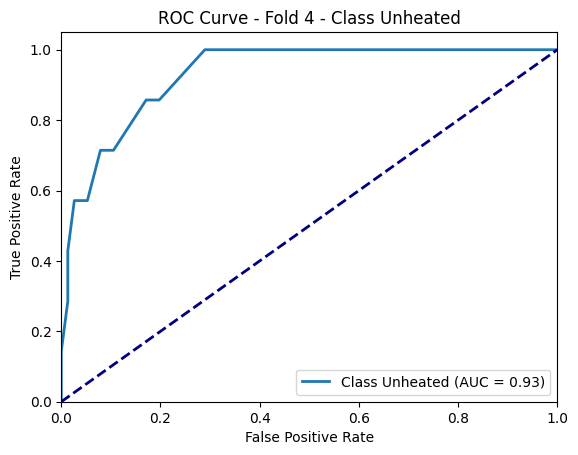

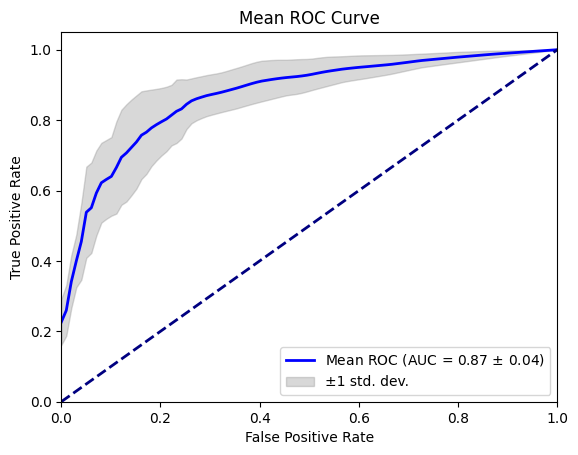

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 0

mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
all_auc = []

for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    clf = RandomForestClassifier(n_estimators=26)
    clf.fit(X_tr, y_tr)
    pred_prob = clf.predict_proba(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(clf.classes_)):
        fpr[i], tpr[i], _ = roc_curve((y_val == clf.classes_[i]).astype(int), pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot individual class ROC curves
        plt.figure()
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {clf.classes_[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Fold {fold} - Class {clf.classes_[i]}')
        plt.legend(loc="lower right")
        plt.show()

    # Interpolate the average tpr at the mean_fpr
    interp_tpr = np.zeros_like(mean_fpr)
    for i in range(len(clf.classes_)):
        interp_tpr += np.interp(mean_fpr, fpr[i], tpr[i])

    interp_tpr /= len(clf.classes_)
    all_tpr.append(interp_tpr)
    all_auc.append(np.mean(list(roc_auc.values())))

    fold += 1

# Calculate the mean and standard deviation of the averaged tpr
mean_tpr = np.mean(all_tpr, axis=0)
std_tpr = np.std(all_tpr, axis=0)

# Plot the averaged ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {np.mean(all_auc):.2f} $\pm$ {np.std(all_auc):.2f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='grey', alpha=0.3, label='±1 std. dev.')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()


{0: 'Direct', 1: 'Ember', 2: 'Sandbath', 3: 'Unheated'}


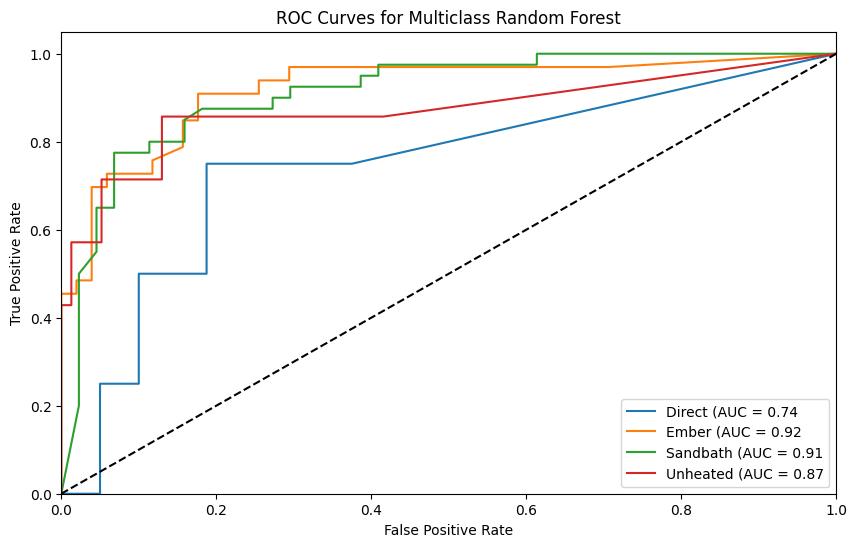

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Train your multiclass classifier (e.g., Random Forest)
rf_model = RandomForestClassifier(n_estimators=26, random_state=i)
rf_model.fit(X_train, y_train)

# Binarize the labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Create a OneVsRestClassifier
rf_ovr = OneVsRestClassifier(rf_model)
rf_ovr.fit(X_train, y_train)

# Get predicted probabilities for each class
y_scores = rf_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_train))):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
# Get unique class labels from y_train
unique_classes = np.unique(y_train)

# Create class_names dictionary based on the order of unique classes
class_names = {i: class_name for i, class_name in enumerate(unique_classes)}

# Print the class_names dictionary for verification
print(class_names)


#Plot the ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Random Forest')
plt.legend(loc="lower right")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
num_bootstraps = 100
auc_dict = []
rf_model = RandomForestClassifier(n_estimators=26, random_state=42069)
for i in range(num_bootstraps):
  # Generate a bootstrap sample
  X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=i)

  # Train the model on the bootstrap sample
  rf_model.fit(X_bootstrap, y_bootstrap)

  # Binarize the labels for multiclass ROC curve
  y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Create a OneVsRestClassifier
  rf_ovr = OneVsRestClassifier(rf_model)
  rf_ovr.fit(X_train, y_train)

  # Get predicted probabilities for each class
  y_scores = rf_ovr.predict_proba(X_test)

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  # Get unique class labels from y_train
  unique_classes = np.unique(y_train)

  # Create class_names dictionary based on the order of unique classes
  class_names = {i: class_name for i, class_name in enumerate(unique_classes)}

  auc_dict.append(roc_auc.copy())

# Initialize a dictionary to store the mean for each class
class_means = {class_label: [] for class_label in auc_dict[0]}

# Iterate through the list of dictionaries and append values for each class
for d in auc_dict:
    for class_label, value in d.items():
        class_means[class_label].append(value)

# Calculate the mean for each class
for class_label, values in class_means.items():
    mean_value = sum(values) / len(values)
    print(f"Class {class_label}: {mean_value}")

NameError: name 'resample' is not defined